In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightkurve as lk
import os.path
import csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/full_key.csv')
df=df.dropna()
df


,GDR2_ID,GDR2_RA,GDR2_DEC,TLC,mas_parrallax,g_mag,bp-rp,probability,age_myr,age_err_lower,age_err_upper,Distance
0,3239529836638867840,73.8034,4.7175,-1,4.17,17.8,3.5,0.34,28.3,8.4,5.7,239.808154
1,6099439604319602560,217.3498,-44.7853,22,5.96,15.6,3.0,0.94,12.0,2.7,3.0,167.785235
3,5774202930948040064,266.3687,-82.1980,21,6.26,16.1,3.1,0.90,18.2,5.6,4.8,159.744409
5,3442418800302357248,83.0898,28.3245,17,5.22,16.1,3.0,0.89,15.6,3.3,5.3,191.570881
7,1937498784187322624,351.8766,45.0985,-1,3.83,16.7,2.9,0.24,22.8,9.6,4.3,261.096606
...,...,...,...,...,...,...,...,...,...,...,...,...
30512,153029341159820672,68.0773,29.3214,0,3.14,18.0,3.4,0.14,29.0,20.3,10.1,318.471338
30513,153099400666673664,67.7235,29.6390,0,4.32,18.0,4.0,0.95,10.1,2.9,2.2,231.481482
30515,119376146388040192,53.5160,27.8593,0,4.10,17.3,3.5,0.47,15.1,4.0,3.6,243.902439
30516,119274338482666112,50.9329,29.5733,0,3.48,17.9,3.9,0.95,7.6,2.2,1.9,287.356322


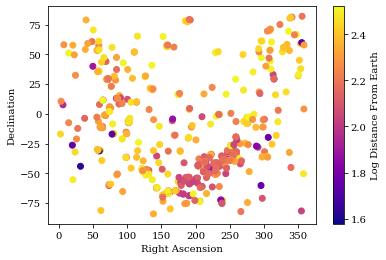

In [30]:
rightAscension = df['GDR2_RA'][:500]
declination = df['GDR2_DEC'][:500]
distances = np.array(df['Distance'][:500])

plt.scatter(rightAscension,declination,c=np.log10(distances),cmap='plasma')

plt.rcParams['font.family']='serif'
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

c = plt.colorbar()
c.set_label("Log Distance From Earth")

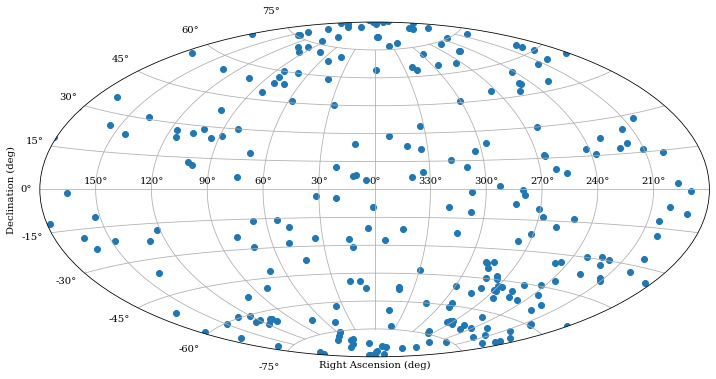

In [32]:
plt.figure(figsize=(12, 8))
plt.subplot(projection="aitoff")

plt.scatter(rightAscension, declination)

plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')

plt.grid(True)
plt.show()

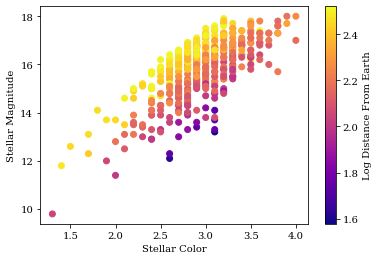

In [34]:
stellarColors = df['bp-rp'][:500]
stellarMags = df['g_mag'][:500]
ax = plt.scatter(stellarColors, stellarMags,c=np.log10(distances[:500]),cmap='plasma')
plt.xlabel("Stellar Color")
plt.ylabel("Stellar Magnitude")

c = plt.colorbar()
c.set_label("Log Distance From Earth")

In [58]:
closest_50 = pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/sunnyhills/main/data/closest_50.csv')
closest_50 
append = closest_50[47:].shift(-1)

closest_50[47:] = append
closest_50 = closest_50.dropna()
closest_50

,GDR2_ID,TIC_ID,Distance
0,4310275491469537152,102107794.0,11.135857
1,5908372482296952064,334524122.0,14.144272
2,6558208838138808576,140045538.0,14.861049
3,3136952686035250688,266744225.0,14.920919
4,2797745549200763520,150899679.0,15.216068
5,5408648849826522112,36124955.0,15.436863
6,4880837088995525632,593228.0,15.610365
7,662732046688476288,178246933.0,16.600266
8,1683677624423753472,950715112.0,17.349063
9,6603693881832177792,206605718.0,20.859408


In [ ]:
missingIDs = []
for ID in closest_50['TIC_ID']:
    filename = "TIC " + str(int(ID))
    #search_result = lk.search_lightcurvefile('TIC ' +str(int(ID))).download()
    try:
        search_result = lk.search_lightcurvefile(filename).download()
        search_result.plot()
        plt.savefig('C:/Users/60002/Documents/GitHub/sunnyhills/data/LightCurve_plots/'+filename)
    except AttributeError:
        print(filename + "not found")
        missingIDs.append(filename)
    else:
        csv = search_result.to_csv('C:/Users/60002/Documents/GitHub/sunnyhills/data/LightCurve_keys/'+filename)
        

In [62]:
missingIDs
missingIDs = pd.Series(missingIDs)
missingIDs.to_csv('C:/Users/60002/Documents/GitHub/sunnyhills/data/missingids')